# Libraries

In [1]:
import os, json, requests, string, time, glob, aiohttp, asyncio, warnings, math, pickle
warnings.filterwarnings('ignore')
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from tqdm import tqdm
from tqdm.asyncio import tqdm as atqdm
from tqdm.notebook import tqdm as ntqdm

# Edit this section

In [2]:
thn_anggaran = '2024'
nama_file = 'sirup_2024_15_Agus'

# No need to edit below sections

In [3]:
per_page = '50000'

# Open the browser

In [4]:
options = webdriver.ChromeOptions()
options.add_argument('w3c')
options.add_argument('--disable_gpu')
options.add_argument('--no-sandbox')
options.add_argument("--start-maximized")
options.add_argument("--window-size=1920,1080")
#options.add_argument("--headless")

caps = DesiredCapabilities.CHROME
caps['goog:loggingPrefs'] = {'performance': 'ALL'}
DRIVER = webdriver.Chrome(options=options)

In [5]:
initial_url = 'https://sirup.lkpp.go.id/sirup/caripaketctr/index'

In [6]:
DRIVER.get(initial_url)

In [7]:
S = requests.Session()
for cookie in DRIVER.get_cookies(): S.cookies.set(cookie['name'], cookie['value'])

In [8]:
headers = {
    'Accept': 'application/json, text/plain, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'X-Requested-With': 'XMLHttpRequest',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36'
    'Auth'
}

In [9]:
url_head = 'https://sirup.lkpp.go.id/sirup/caripaketctr/search?tahunAnggaran='+thn_anggaran+'&jenisPengadaan=&metodePengadaan=&minPagu=&maxPagu=&bulan=&lokasi=&kldi=&pdn=&ukm=&draw=2&columns%5B0%5D%5Bdata%5D=&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=false&columns%5B0%5D%5Borderable%5D=false&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=paket&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=pagu&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=jenisPengadaan&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=isPDN&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=isUMK&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=metode&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B7%5D%5Bdata%5D=pemilihan&columns%5B7%5D%5Bname%5D=&columns%5B7%5D%5Bsearchable%5D=true&columns%5B7%5D%5Borderable%5D=true&columns%5B7%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B7%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B8%5D%5Bdata%5D=kldi&columns%5B8%5D%5Bname%5D=&columns%5B8%5D%5Bsearchable%5D=true&columns%5B8%5D%5Borderable%5D=true&columns%5B8%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B8%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B9%5D%5Bdata%5D=satuanKerja&columns%5B9%5D%5Bname%5D=&columns%5B9%5D%5Bsearchable%5D=true&columns%5B9%5D%5Borderable%5D=true&columns%5B9%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B9%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B10%5D%5Bdata%5D=lokasi&columns%5B10%5D%5Bname%5D=&columns%5B10%5D%5Bsearchable%5D=true&columns%5B10%5D%5Borderable%5D=true&columns%5B10%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B10%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B11%5D%5Bdata%5D=id&columns%5B11%5D%5Bname%5D=&columns%5B11%5D%5Bsearchable%5D=true&columns%5B11%5D%5Borderable%5D=true&columns%5B11%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B11%5D%5Bsearch%5D%5Bregex%5D=false&order%5B0%5D%5Bcolumn%5D=5&order%5B0%5D%5Bdir%5D=DESC&search%5Bvalue%5D=&search%5Bregex%5D=false&start='
url_middle = '&length='
url_tail =  '&_=1723085212758'

# Get Total Rows

In [10]:
r = S.get(url_head+'0'+url_middle+'10'+url_tail, headers=headers)

In [11]:
total_rows = r.json()['recordsFiltered']

In [12]:
total_pages = math.ceil(total_rows/int(per_page))

In [13]:
total_rows, total_pages

(3897989, 78)

In [14]:
r.text

'{"recordsFiltered":3897989,"data":[{"idBulan":1,"pagu":9750000,"satuanKerja":"Kecamatan Marikit","isPDN":true,"idlokasi":0,"idKldi":"D236","metode":"Pengadaan Langsung","sumberDana":"APBD, APBD, APBD, APBD","kldi":"Kab. Katingan","isUMK":true,"idsLokasi":"14870","id_referensi":525,"lokasi":"Kalimantan Tengah, Katingan (Kab.)","jenisPengadaan":"Jasa Lainnya","idSatker":86962,"pemilihan":"January 2024","idMetode":8,"id":48125568,"idJenisPengadaan":4,"paket":"Belanja Makanan dan Minuman Rapat","pds":false},{"idBulan":6,"pagu":340515000,"satuanKerja":"DINAS PANGAN","isPDN":true,"idlokasi":0,"idKldi":"D462","metode":"E-Purchasing","sumberDana":"APBD","kldi":"Provinsi Sumatera Barat","isUMK":true,"idsLokasi":"14675","id_referensi":239,"lokasi":"Sumatera Barat, Padang (Kota)","jenisPengadaan":"Barang","idSatker":101444,"pemilihan":"June 2024","idMetode":9,"id":48125571,"idJenisPengadaan":1,"paket":"Pengadaan Ayam dan Pakan Ayam","pds":false},{"idBulan":5,"pagu":94500000,"satuanKerja":"Dinas 

# Create temp dir

In [14]:
dir = 'sirup_json_data_15_agus'
if not os.path.exists(dir): os.makedirs(dir)

# Download all JSON

In [15]:
pbar = ntqdm(total=total_pages)
for i in range(total_pages):
    #print(i)
    start_from = i*int(per_page)
    url_to = url_head + str(start_from) + url_middle + per_page + url_tail
    r = S.get(url_to, headers=headers)
    with open(dir+'/page_'+str(i)+'.json', 'w') as f: json.dump(r.json(), f)
    pbar.update(1)

pbar.close()

  0%|          | 0/78 [00:00<?, ?it/s]

# Compile the JSONs

In [22]:
all_files = glob.glob(dir+'/*.json')
df_list = []

for filename in all_files:
    with open(filename, 'r') as f:
        dd = json.load(f)['data']
        temp_df = pd.DataFrame(dd)
        df_list.append(temp_df)

In [23]:
df = pd.concat(df_list, ignore_index=True, axis=0)

In [24]:
df

,idBulan,pagu,satuanKerja,isPDN,idlokasi,idKldi,metode,sumberDana,kldi,isUMK,...,id_referensi,lokasi,jenisPengadaan,idSatker,pemilihan,idMetode,id,idJenisPengadaan,paket,pds
0,1,171000,Dinas Tenaga Kerja dan Transmigrasi,True,0,D266,E-Purchasing,APBD,Kota Metro,True,...,328,"Lampung, Metro (Kota)",Barang,348104,January 2024,9,48657251,1,"Belanja Jasa Iklan/Reklame, Film, dan Pemotret...",False
1,2,150000,Dinas Perpustakaan Daerah dan Kearsipan,True,0,D256,E-Purchasing,APBD,Provinsi Kepulauan Riau,True,...,736,"Kepulauan Riau, Tanjung Pinang (Kota)",Barang,337324,February 2024,9,48657273,1,Belanja Alat/Bahan untuk Kegiatan Kantor-Benda...,False
2,1,4045000,SEKRETARIAT DAERAH,True,0,D216,E-Purchasing,"APBD, APBD",Kota Banjarbaru,True,...,543,"Kalimantan Selatan, Banjar Baru (Kota)",Barang,174868,January 2024,9,48657282,1,Belanja Alat/Bahan untuk Kegiatan Kantor- Kert...,False
3,1,47000000,Dinas Kesehatan,True,0,D100,E-Purchasing,"APBD, APBD",Kab. Majalengka,True,...,367,"Jawa Barat, Majalengka (Kab.)",Barang,59849,January 2024,9,48657333,1,Belanja Modal Komputer Unit Lainnya,False
4,1,36000000,Dinas Kesehatan,True,0,D100,Pengadaan Langsung,APBD,Kab. Majalengka,True,...,367,"Jawa Barat, Majalengka (Kab.)",Jasa Lainnya,59849,January 2024,8,48657346,4,Belanja Tagihan Telepon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879787,10,56375000,"DINAS PERUMAHAN RAKYAT, KAWASAN PERMUKIMAN DAN...",True,0,D47,Pengadaan Langsung,APBD,Kota Tangerang Selatan,True,...,721,"Banten, Tangerang Selatan (Kota)",Jasa Konsultansi,104326,October 2024,8,47918498,3,Perencanaan Saluran Drainase / Gorong-gorong L...,False
3879788,2,514500,KECAMATAN CIAWI,True,0,D108,E-Purchasing,APBD,Kab. Bogor,True,...,337,"Jawa Barat, Bogor (Kab.)",Barang,73682,February 2024,9,47918547,1,Belanja Alat/Bahan untuk Kegiatan Kantor- Kert...,False
3879789,2,837900,KECAMATAN CIAWI,True,0,D108,E-Purchasing,APBD,Kab. Bogor,True,...,337,"Jawa Barat, Bogor (Kab.)",Barang,73682,February 2024,9,47918549,1,Belanja Alat/Bahan untuk Kegiatan Kantor-Bahan...,False
3879790,1,763200000,KANTOR KESYAHBANDARAN DAN OTORITAS PELABUHAN U...,True,0,K26,Penunjukan Langsung,APBN,Kementerian Perhubungan,True,...,447,"DKI Jakarta, Jakarta Utara (Kota)",Barang,5932,January 2024,7,47918563,1,Makan Rapat,False


In [25]:
df.to_csv(nama_file+'.csv', index=False, sep='\t')

In [164]:
df.to_feather(nama_file+'.feather')

# Close the browser

In [ ]:
DRIVER.quit()

In [163]:
#!pip install pyarrow

In [ ]:
df.head(3).T

,0,1,2
idBulan,1,1,1
pagu,3000000,6528665,250000
satuanKerja,DINAS LINGKUNGAN HIDUP DAN KEBERSIHAN,Badan Kepegawaian dan Pengembangan Sumber Daya...,Badan Kesatuan Bangsa dan Politik
isPDN,True,True,True
idlokasi,0,0,0
idKldi,D379,D459,D89
metode,E-Purchasing,E-Purchasing,Dikecualikan
sumberDana,APBD,"APBD, APBD, APBD",APBD
kldi,Kab. Indragiri Hilir,Kab. Minahasa Selatan,Kota Jambi
isUMK,True,True,True


In [ ]:
#with open('sirup_2024.pkl', 'wb') as f: pickle.dump(df, f)

In [59]:
#with open('sirup_2024.pkl', 'rb') as f: df_pickle = pickle.load(f)

In [60]:
#with open('sirup_2024.csv', 'wb') as f: df.to_csv(f, index=False, sep='\t')

In [61]:
#with open('sirup_2024.csv', 'rb') as f: df_csv = pd.read_csv(f, sep='\t')

: 

# Analyze SIRUP

In [2]:
#df = pd.read_csv('sirup_2024_15_agus.csv', sep='\t')
df = pd.read_feather('sirup_2024_15_agus.feather')

In [61]:
pd.options.display.float_format = '{:,.2f}'.format

In [30]:
df

,idBulan,pagu,satuanKerja,isPDN,idlokasi,idKldi,metode,sumberDana,kldi,isUMK,...,id_referensi,lokasi,jenisPengadaan,idSatker,pemilihan,idMetode,id,idJenisPengadaan,paket,pds
0,1,171000,Dinas Tenaga Kerja dan Transmigrasi,True,0,D266,E-Purchasing,APBD,Kota Metro,True,...,328,"Lampung, Metro (Kota)",Barang,348104,January 2024,9,48657251,1,"Belanja Jasa Iklan/Reklame, Film, dan Pemotret...",False
1,2,150000,Dinas Perpustakaan Daerah dan Kearsipan,True,0,D256,E-Purchasing,APBD,Provinsi Kepulauan Riau,True,...,736,"Kepulauan Riau, Tanjung Pinang (Kota)",Barang,337324,February 2024,9,48657273,1,Belanja Alat/Bahan untuk Kegiatan Kantor-Benda...,False
2,1,4045000,SEKRETARIAT DAERAH,True,0,D216,E-Purchasing,"APBD, APBD",Kota Banjarbaru,True,...,543,"Kalimantan Selatan, Banjar Baru (Kota)",Barang,174868,January 2024,9,48657282,1,Belanja Alat/Bahan untuk Kegiatan Kantor- Kert...,False
3,1,47000000,Dinas Kesehatan,True,0,D100,E-Purchasing,"APBD, APBD",Kab. Majalengka,True,...,367,"Jawa Barat, Majalengka (Kab.)",Barang,59849,January 2024,9,48657333,1,Belanja Modal Komputer Unit Lainnya,False
4,1,36000000,Dinas Kesehatan,True,0,D100,Pengadaan Langsung,APBD,Kab. Majalengka,True,...,367,"Jawa Barat, Majalengka (Kab.)",Jasa Lainnya,59849,January 2024,8,48657346,4,Belanja Tagihan Telepon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879787,10,56375000,"DINAS PERUMAHAN RAKYAT, KAWASAN PERMUKIMAN DAN...",True,0,D47,Pengadaan Langsung,APBD,Kota Tangerang Selatan,True,...,721,"Banten, Tangerang Selatan (Kota)",Jasa Konsultansi,104326,October 2024,8,47918498,3,Perencanaan Saluran Drainase / Gorong-gorong L...,False
3879788,2,514500,KECAMATAN CIAWI,True,0,D108,E-Purchasing,APBD,Kab. Bogor,True,...,337,"Jawa Barat, Bogor (Kab.)",Barang,73682,February 2024,9,47918547,1,Belanja Alat/Bahan untuk Kegiatan Kantor- Kert...,False
3879789,2,837900,KECAMATAN CIAWI,True,0,D108,E-Purchasing,APBD,Kab. Bogor,True,...,337,"Jawa Barat, Bogor (Kab.)",Barang,73682,February 2024,9,47918549,1,Belanja Alat/Bahan untuk Kegiatan Kantor-Bahan...,False
3879790,1,763200000,KANTOR KESYAHBANDARAN DAN OTORITAS PELABUHAN U...,True,0,K26,Penunjukan Langsung,APBN,Kementerian Perhubungan,True,...,447,"DKI Jakarta, Jakarta Utara (Kota)",Barang,5932,January 2024,7,47918563,1,Makan Rapat,False


In [27]:
df.head(3).T

,0,1,2
idBulan,1,2,1
pagu,171000,150000,4045000
satuanKerja,Dinas Tenaga Kerja dan Transmigrasi,Dinas Perpustakaan Daerah dan Kearsipan,SEKRETARIAT DAERAH
isPDN,True,True,True
idlokasi,0,0,0
idKldi,D266,D256,D216
metode,E-Purchasing,E-Purchasing,E-Purchasing
sumberDana,APBD,APBD,"APBD, APBD"
kldi,Kota Metro,Provinsi Kepulauan Riau,Kota Banjarbaru
isUMK,True,True,True


In [74]:
df['instansi'] = df['kldi']
df['IDinstansi'] = df['idKldi']
#df['anggaran'] = df['pagu'].astype(float)

## Banyak Instansi

In [45]:
df['instansi'].nunique()

666

## Total Pagu

In [58]:
"{:,.2f}".format(df['anggaran'].sum()).replace(',', '*').replace('.', ',').replace('*', '.')

'903.001.188.900.701,00'

In [75]:
grouped = df.groupby('instansi').agg({'anggaran':'sum'}).reset_index()

In [99]:
grouped['anggaran'].min()

647104036.0

## Max, Min, Mean, Median

In [107]:
sum_anggaran = grouped['anggaran'].sum()
max_anggaran = grouped['anggaran'].max()
min_anggaran = grouped['anggaran'].min()
mean_anggaran = grouped['anggaran'].mean()
median_anggaran = grouped['anggaran'].median()

In [95]:
max_anggaran, min_anggaran, mean_anggaran, median_anggaran

(165195265391470.0, 647104036.0, 1355857640992.0435, 377873403965.0)

In [108]:
max_min = [
    {'uraian':'Total Anggaran', 'nilai':"{:,.2f}".format(sum_anggaran).replace(',', '*').replace('.', ',').replace('*', '.')},
    {'uraian':'Anggaran Tertinggi', 'nilai':"{:,.2f}".format(max_anggaran).replace(',', '*').replace('.', ',').replace('*', '.')},
    {'uraian':'Rata-rata Anggaran', 'nilai':"{:,.2f}".format(mean_anggaran).replace(',', '*').replace('.', ',').replace('*', '.')},
    {'uraian':'Median Anggaran', 'nilai':"{:,.2f}".format(median_anggaran).replace(',', '*').replace('.', ',').replace('*', '.')},
    {'uraian':'Anggaran Terendah', 'nilai':"{:,.2f}".format(min_anggaran).replace(',', '*').replace('.', ',').replace('*', '.')},
]

df_max_min = pd.DataFrame(max_min)

In [109]:
df_max_min

,uraian,nilai
0,Total Anggaran,"903.001.188.900.701,00"
1,Anggaran Tertinggi,"165.195.265.391.470,00"
2,Rata-rata Anggaran,"1.355.857.640.992,04"
3,Median Anggaran,"377.873.403.965,00"
4,Anggaran Terendah,"647.104.036,00"


In [110]:
df_styled = df_max_min.style.hide().background_gradient()

In [111]:
dfi.export(df_styled, 'deskripsi_instansi_anggaran.png')

## Violin

In [117]:
sns.set()
#plt.style.use('seaborn')

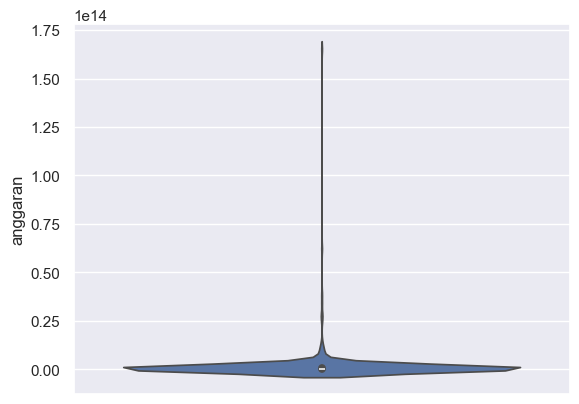

In [122]:
ax = sns.violinplot(data=grouped, y='anggaran')

## Top Spender

In [84]:
#!pip install dataframe_image

In [134]:
sorted_summed = grouped.sort_values('anggaran', ascending=False)#.reset_index()
sorted_summed['ranking'] = sorted_summed['anggaran'].rank(ascending=False, method='first').astype(int)
sorted_summed['anggaran_triliun'] = (sorted_summed['anggaran']/1000000000000)
sorted_summed['anggaran'] = sorted_summed['anggaran'].map("{:_.2f}".format).str.translate(str.maketrans('_.', '.,'))
#sorted_summed['ranking'] = sorted_summed['anggaran'].rank(ascending=False, method='first').astype(int)

In [135]:
sorted_summed.head(10)[['ranking', 'instansi', 'anggaran', 'anggaran_triliun']]

,ranking,instansi,anggaran,anggaran_triliun
470,1,Kementerian Pekerjaan Umum dan Perumahan Rakyat,"165.195.265.391.470,00",165.20
479,2,Kementerian Pertahanan,"62.328.298.237.948,00",62.33
483,3,Kepolisian Negara Republik Indonesia,"38.759.683.257.517,00",38.76
623,4,Provinsi DKI Jakarta,"34.080.758.693.641,00",34.08
477,5,Kementerian Perhubungan,"28.734.644.741.627,00",28.73
458,6,Kementerian Kesehatan,"27.491.505.677.054,00",27.49
474,7,Kementerian Pendidikan dan Kebudayaan,"25.038.963.567.417,00",25.04
461,8,Kementerian Komunikasi Dan Informatika,"14.761.555.633.567,00",14.76
460,9,Kementerian Keuangan,"12.120.722.556.480,00",12.12
486,10,Komisi Pemilihan Umum,"11.603.826.166.707,00",11.60


In [92]:
df_styled = sorted_summed.head(10)[['ranking', 'instansi', 'anggaran']].style.hide().background_gradient()

In [93]:
dfi.export(df_styled, 'top_10_instansi_anggaran.png')

In [86]:
sorted_summed.to_excel('sirup_2024_top_spender.xlsx', index=False)

[Text(0.5, 0, 'Anggaran (dalam Triliun Rupiah)'), Text(0, 0.5, 'Instansi')]

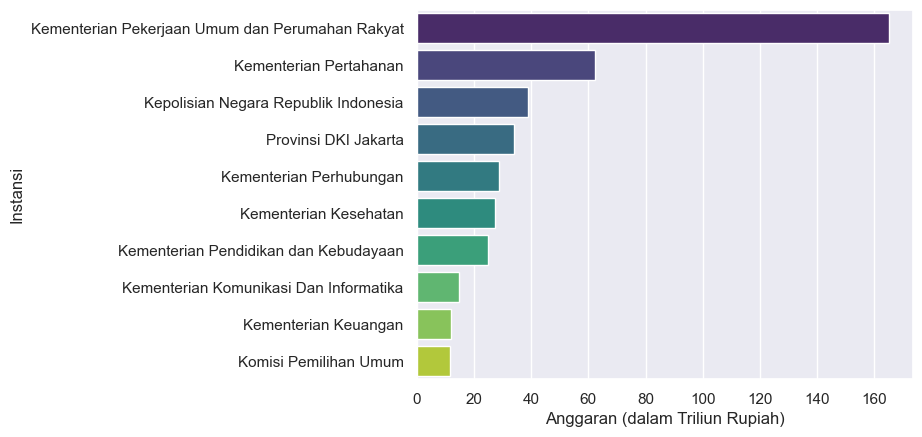

In [145]:
ax = sns.barplot(sorted_summed.head(10), x='anggaran_triliun', y='instansi', palette='viridis')
ax.set(xlabel='Anggaran (dalam Triliun Rupiah)', ylabel='Instansi')

In [157]:
fig = ax.get_figure()
#figure(figsize=(16, 9), dpi=80)
fig.set_size_inches(16.67, 9.37)
#fig.figure(figsize=(10, 10))
fig.savefig('top_10_instansi_anggaran_barplot.png', dpi=100)

## Least Spender

In [ ]:
#!pip install dataframe_image

In [159]:
sorted_summed_min = grouped.sort_values('anggaran', ascending=True)#.reset_index()
sorted_summed_min['ranking'] = sorted_summed_min['anggaran'].rank(ascending=False, method='first').astype(int)
sorted_summed_min['anggaran_triliun'] = (sorted_summed_min['anggaran']/1000000000000)
sorted_summed_min['anggaran'] = sorted_summed_min['anggaran'].map("{:_.2f}".format).str.translate(str.maketrans('_.', '.,'))
#sorted_summed['ranking'] = sorted_summed['anggaran'].rank(ascending=False, method='first').astype(int)

In [102]:
sorted_summed_min.head(10)[['ranking', 'instansi', 'anggaran']]

,ranking,instansi,anggaran
600,666,PDAM Provinsi DKI Jakarta,"647.104.036,00"
614,665,Pemerintah Daerah Provinsi Jawa Timur,"1.000.000.000,00"
598,664,PDAM Kabupaten Semarang,"1.193.760.000,00"
617,663,Perumda Pasar dan Pangan Mangu Giri Sedana Kab...,"1.688.639.503,00"
616,662,Perumda Air Minum Tirta Lematang,"2.500.000.000,00"
609,661,PT Sayaga Wisata,"2.567.000.000,00"
612,660,Pemerintah Daerah Kabupaten Blitar,"2.963.800.000,00"
607,659,PERUMDA Air Minum Tirta Taka Kabupaten Nunukan,"3.886.170.500,00"
596,658,PD PAL Jaya,"5.303.912.600,00"
597,657,PDAM Kabupaten Buleleng,"6.240.000.000,00"


In [103]:
df_styled = sorted_summed_min.head(10)[['ranking', 'instansi', 'anggaran']].style.hide().background_gradient()

In [104]:
dfi.export(df_styled, 'bottom_10_instansi_anggaran.png')

[Text(0.5, 0, 'Anggaran (dalam Triliun Rupiah)'), Text(0, 0.5, 'Instansi')]

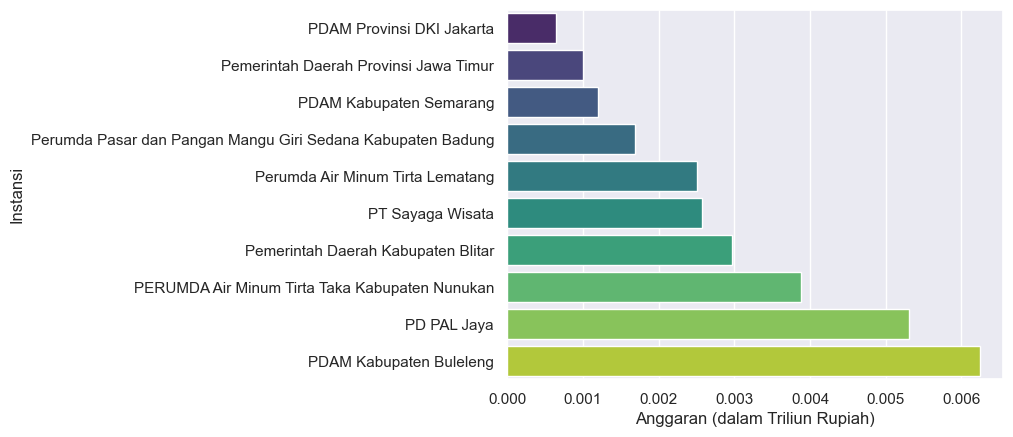

In [160]:
ax = sns.barplot(sorted_summed_min.head(10), x='anggaran_triliun', y='instansi', palette='viridis')
ax.set(xlabel='Anggaran (dalam Triliun Rupiah)', ylabel='Instansi')

In [161]:
fig = ax.get_figure()
#figure(figsize=(16, 9), dpi=80)
fig.set_size_inches(16.67, 9.37)
#fig.figure(figsize=(10, 10))
fig.savefig('bottom_10_instansi_anggaran_barplot.png', dpi=100)

## PU Top Ten